# Black Friday Sales Prediction

This problem was discovered on the Interet and the dataset is available in the datasets folder on my page. I decided to create purchase buckets for this problem instead of the typical regression approach. These buckets were then converted into numerical values for prediction purposes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.

In [2]:
dataset=r'C:\Users\claudius.ibine\Desktop\black-friday-dataset.csv'
dataset=pd.read_csv(dataset,index_col=None)
dataset=dataset[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]

Here is where I summarized the dataset.

In [3]:
def aggregate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The first 10 records are:')
    print(dataset.head(5))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [5]:
aggregate()

The number of rows by columns:  (550068, 10)

The first 10 records are:
  Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  


Here is where I cleaned the dataset.

In [6]:
def clean():
    print(dataset.isnull().sum()) #check nulll values
    print(dataset.describe()) #check for low values in min
    print(dataset.head(10))

In [7]:
clean()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
          Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
count  550068.000000   550068.000000       550068.000000       376430.000000   
mean        8.076707        0.409653            5.404270            9.842329   
std         6.522660        0.491770            3.936211            5.086590   
min         0.000000        0.000000            1.000000            2.000000   
25%         2.000000        0.000000            1.000000            5.000000   
50%         7.000000        0.000000            5.000000            9.000000   
75%        14.000000        1.000000            8.000000 

In [8]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].mode()[0], inplace=True)
dataset['Product_Category_3'].fillna(dataset['Product_Category_3'].mode()[0], inplace=True)
dataset['Purchase_Bin']=pd.cut(dataset['Purchase'],[0,200,400,600,800,1000,10000,100000,1000000000],labels=['0-200','200-400','400-600','600-800','800-1000','1000-10000','10000-100000','100000-1000000000'])

In [9]:
print(dataset.head(11))

   Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0       F   0-17          10             A                          2   
1       F   0-17          10             A                          2   
2       F   0-17          10             A                          2   
3       F   0-17          10             A                          2   
4       M    55+          16             C                         4+   
5       M  26-35          15             A                          3   
6       M  46-50           7             B                          2   
7       M  46-50           7             B                          2   
8       M  46-50           7             B                          2   
9       M  26-35          20             A                          1   
10      M  26-35          20             A                          1   

    Marital_Status  Product_Category_1  Product_Category_2  \
0                0                   3                 8.0   

Here I will convert the string values to numericals for the machine learning model.

In [10]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.Gender = le.fit_transform(processed_df.Gender)
    processed_df.Age = le.fit_transform(processed_df.Age)
    processed_df.City_Category = le.fit_transform(processed_df.City_Category)
    processed_df.Stay_In_Current_City_Years = le.fit_transform(processed_df.Stay_In_Current_City_Years)
    processed_df.Purchase_Bin = le.fit_transform(processed_df.Purchase_Bin)
    return processed_df
dataset=preprocess_dataset(dataset)

In [11]:
print(dataset.head(11))

    Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0        0    0          10              0                           2   
1        0    0          10              0                           2   
2        0    0          10              0                           2   
3        0    0          10              0                           2   
4        1    6          16              2                           4   
5        1    2          15              0                           3   
6        1    4           7              1                           2   
7        1    4           7              1                           2   
8        1    4           7              1                           2   
9        1    2          20              0                           1   
10       1    2          20              0                           1   

    Marital_Status  Product_Category_1  Product_Category_2  \
0                0                   3           

Here I will identify the feature and target column and split the dataset into training and testing

In [12]:
feature=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
target='Purchase_Bin'

x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

Here I will determine the best model for this problem using the below function.

In [13]:
def algorithms():
    print('The predicted accuracy scores for the models are as follows:')
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_prediction=lr.predict(x_test)
    print('LR: {0:4f}'.format(metrics.accuracy_score(y_test,lr_prediction)))

    lda=LinearDiscriminantAnalysis()
    lda.fit(x_train,y_train)
    lda_prediction=lda.predict(x_test)
    print('LDA: {0:4f}'.format(metrics.accuracy_score(y_test,lda_prediction)))

    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_prediction=knn.predict(x_test)
    print('KNN: {0:4f}'.format(metrics.accuracy_score(y_test,knn_prediction)))

    cart=DecisionTreeClassifier()
    cart.fit(x_train,y_train)
    cart_prediction=cart.predict(x_test)
    print('CART: {0:4f}'.format(metrics.accuracy_score(y_test,cart_prediction)))

    nb=GaussianNB()
    nb.fit(x_train,y_train)
    nb_prediction=nb.predict(x_test)
    print('NB: {0:4f}'.format(metrics.accuracy_score(y_test,nb_prediction)))

    svm=SVC()
    svm.fit(x_train,y_train)
    svm_prediction=svm.predict(x_test)
    print('SVM: {0:4f}'.format(metrics.accuracy_score(y_test,svm_prediction)))

In [14]:
algorithms()

The predicted accuracy scores for the models are as follows:
LR: 0.750777
LDA: 0.746678
KNN: 0.869130
CART: 0.861722
NB: 0.460005


Here I will fit the machine learning model.

In [18]:
cart=DecisionTreeClassifier()
cart.fit(x_train,y_train)
cart_prediction=cart.predict(x_test)

In [19]:
features=x_test.reset_index()
features=features[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]
actual=(list(y_test))
prediction=(list(cart_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)
output=features

In [20]:
print(output.head(11))

    Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0        1    1           4              0                           2   
1        1    1           4              2                           3   
2        1    1          20              1                           0   
3        1    2           6              1                           2   
4        1    1          20              2                           1   
5        1    2           6              1                           2   
6        1    3          18              2                           2   
7        1    3           6              1                           2   
8        1    2          17              1                           4   
9        1    2           0              2                           4   
10       1    6          14              2                           3   

    Marital_Status  Product_Category_1  Product_Category_2  \
0                0                   8           

In [21]:
print(output[['actual','prediction']])

        actual  prediction
0            1           1
1            2           2
2            1           1
3            1           2
4            2           1
5            1           1
6            1           1
7            1           1
8            2           1
9            2           2
10           2           2
11           2           2
12           1           1
13           1           1
14           1           1
15           2           1
16           1           1
17           1           2
18           1           1
19           1           1
20           1           1
21           2           2
22           2           2
23           1           1
24           1           1
25           1           1
26           1           1
27           1           2
28           1           1
29           2           2
...        ...         ...
219998       1           1
219999       1           1
220000       2           1
220001       1           1
220002       1           1
2

In [22]:
output=output[['actual','prediction']]

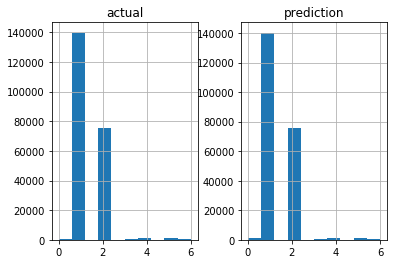

In [23]:
output.hist()
plt.show()